## Figures for Schematics

In [1]:
import avn.dataloading
import avn.plotting
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Plot Plain Example Spectrogram

In [12]:
def plot_spectrogram(spectrogram, sample_rate, ax = None, figsize = (20, 5), out_path = None):
    """
    Plots a spectrogram of a song. 

    Parameters
    ----------
    spectrogram : numpy ndarray, 2D
        Array containing spectrogram data. 
    sample_rate : int
        Sample rate of audio. Necessary to determine time along the x-axis. 
    ax: matplotlob.axes._subplots.AxesSubplot object
        Axis object must be specified if you want to plot the spectrogram as a 
        subplot within a matplotlib.pyplot figure with other subplots as well. 
        If plotting a spectrogram alone, ax doesn't need to be specified.
    figsize : tuple of floats, optional
        Specifies the dimensions of the output plot. The default is (20, 5).

    Returns
    -------
    None.

    """
    #Create plot with given dimensions
    fig, ax = plt.subplots(figsize = figsize, facecolor = 'white')
    #plot spectrogram
    img = librosa.display.specshow(spectrogram, sr = sample_rate, 
                             hop_length = 512 / 4, 
                             x_axis = 'time', 
                             y_axis = 'hz', 
                             cmap = 'viridis', 
                             ax = ax)
    def numfmt(x, pos): # your custom formatter function: divide by 100.0
        s = '{:.0f}'.format(x / 1000.0)
        return s

    import matplotlib.ticker as tkr     # has classes for tick-locating and -formatting
    yfmt = tkr.FuncFormatter(numfmt)

    ax.yaxis.set_major_formatter(yfmt)
    ax.set_ylabel('kHz')
    ax.set_xlabel('Time (s)')

    if out_path is not None:
        fig.savefig(out_path, transparent = True)

In [3]:
plt.rcParams.update({'font.size': 10})

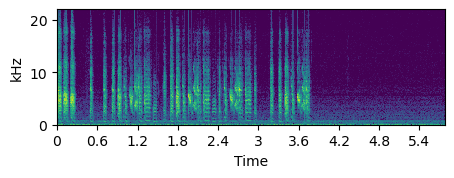

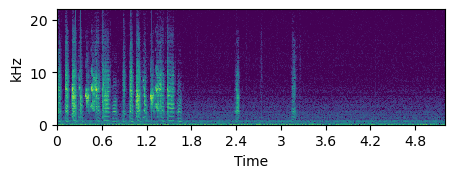

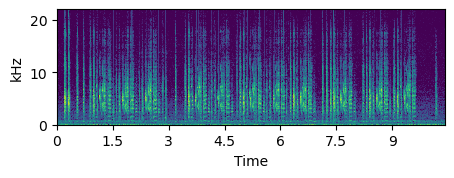

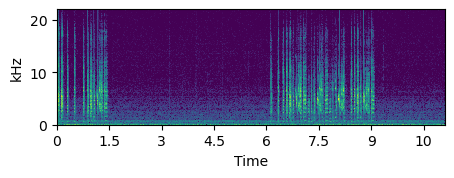

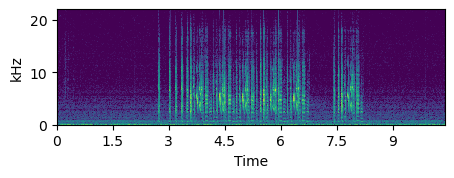

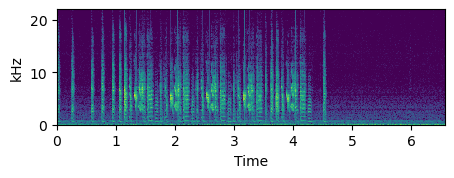

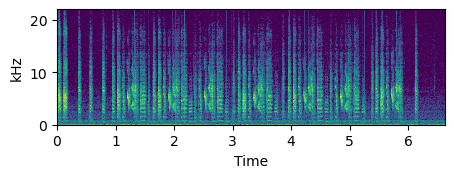

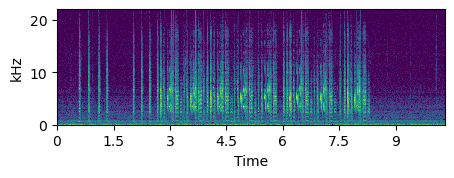

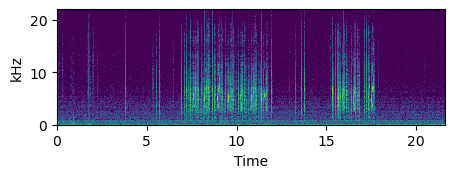

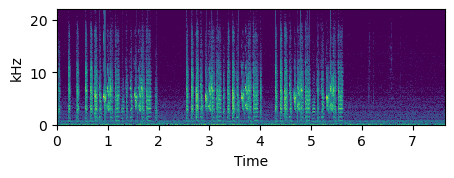

In [4]:
Bird_ID = 'B447'

syll_df = pd.read_csv("D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "larger_set_labels.csv"  ) 

song_folder_path = "G:\\Grad_School\\Song_Data\\avn_larger_song_sets\\" + Bird_ID + "\\"

for i in range(10, 20):
    song_path = song_folder_path + syll_df.files.unique()[i]
    song = avn.dataloading.SongFile(song_path)
    spectrogram = avn.plotting.make_spectrogram(song)
    plot_spectrogram(spectrogram, song.sample_rate, figsize = (5, 1.5))

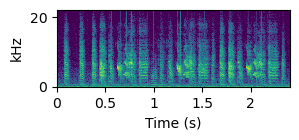

In [13]:
i = 20
song_path = song_folder_path + syll_df.files.unique()[i]
song = avn.dataloading.SongFile(song_path)

song_data, __, __ = avn.dataloading.Utils.select_syll(song, onset = 0.3, offset = 2.7, padding = 0)
song.data = song_data

spectrogram = avn.plotting.make_spectrogram(song)
plot_spectrogram(spectrogram, song.sample_rate, figsize = (3, 1), 
                 out_path = 'B447_plain_example_spectrogram.svg'
                 )

In [71]:
def plot_spectrogram(spectrogram, sample_rate, ax = None, figsize = (20, 5), out_path = None):
    """
    Plots a spectrogram of a song. 

    Parameters
    ----------
    spectrogram : numpy ndarray, 2D
        Array containing spectrogram data. 
    sample_rate : int
        Sample rate of audio. Necessary to determine time along the x-axis. 
    ax: matplotlob.axes._subplots.AxesSubplot object
        Axis object must be specified if you want to plot the spectrogram as a 
        subplot within a matplotlib.pyplot figure with other subplots as well. 
        If plotting a spectrogram alone, ax doesn't need to be specified.
    figsize : tuple of floats, optional
        Specifies the dimensions of the output plot. The default is (20, 5).

    Returns
    -------
    None.

    """
    #Create plot with given dimensions
    fig, ax = plt.subplots(figsize = figsize, facecolor = 'white')
    #plot spectrogram
    img = librosa.display.specshow(spectrogram, sr = sample_rate, 
                             hop_length = 512 / 4, 
                             x_axis = 'time', 
                             y_axis = 'hz', 
                             cmap = 'viridis', 
                             ax = ax)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])

    for spine in ax.spines.values():
            spine.set_edgecolor('white')

    if out_path is not None:
        fig.savefig(out_path, transparent = True)

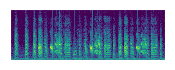

In [28]:
i = 20
song_path = song_folder_path + syll_df.files.unique()[i]
song = avn.dataloading.SongFile(song_path)

song_data, __, __ = avn.dataloading.Utils.select_syll(song, onset = 0.3, offset = 2.7, padding = 0)
song.data = song_data

spectrogram = avn.plotting.make_spectrogram(song)
plot_spectrogram(spectrogram, song.sample_rate, figsize = (2, 0.66), 
                 out_path = 'B447_mini_example_spectrogram_1.svg'
                 )

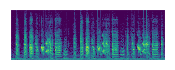

In [29]:
i = 10
song_path = song_folder_path + syll_df.files.unique()[i]
song = avn.dataloading.SongFile(song_path)

song_data, __, __ = avn.dataloading.Utils.select_syll(song, onset = 0.6, offset = 3, padding = 0)
song.data = song_data

spectrogram = avn.plotting.make_spectrogram(song)
plot_spectrogram(spectrogram, song.sample_rate, figsize = (2, 0.66), 
                 out_path = 'B447_mini_example_spectrogram_2.svg'
                 )

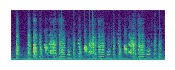

In [30]:
i = 12
song_path = song_folder_path + syll_df.files.unique()[i]
song = avn.dataloading.SongFile(song_path)

song_data, __, __ = avn.dataloading.Utils.select_syll(song, onset = 0.6, offset = 3, padding = 0)
song.data = song_data

spectrogram = avn.plotting.make_spectrogram(song)
plot_spectrogram(spectrogram, song.sample_rate, figsize = (2, 0.66), 
                 out_path = 'B447_mini_example_spectrogram_3.svg'
                 )

## Plot Segmented Syllables

In [44]:
Bird_ID = 'B447'

syll_df = pd.read_csv("D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "larger_set_labels.csv"  ) 
syll_df.labels = 's'
syll_df['Bird_ID'] = Bird_ID

song_folder_path = "G:\\Grad_School\\Song_Data\\avn_larger_song_sets\\" 

In [45]:
syll_df

,Unnamed: 0,onsets,offsets,cluster,files,audio,labels,X,Y,hdbscan_labels,Bird_ID
0,0,0.942,1.023,zebra_finch_0,B447_43505.26440066_2_9_7_20_40.wav,[-0.0013664 0.00302395 0.00632897 ... 0.00...,s,2.327949,7.956043,3,B447
1,1,1.033,1.123,zebra_finch_0,B447_43505.26440066_2_9_7_20_40.wav,[0.00245266 0.00187746 0.00165709 ... 0.001751...,s,1.159319,8.102309,3,B447
2,2,2.097,2.178,zebra_finch_0,B447_43505.26440066_2_9_7_20_40.wav,[ 0.00488253 0.00103991 -0.00070498 ... 0.00...,s,1.288005,7.978543,3,B447
3,3,2.198,2.278,zebra_finch_0,B447_43505.26440066_2_9_7_20_40.wav,[-0.00119649 -0.00093327 0.00040104 ... -0.00...,s,1.293165,8.006783,3,B447
4,4,2.438,2.502,zebra_finch_0,B447_43505.26440066_2_9_7_20_40.wav,[-0.03285876 -0.03878788 -0.04425425 ... -0.00...,s,13.084849,15.518116,5,B447
...,...,...,...,...,...,...,...,...,...,...,...
3126,3126,1.368,1.443,zebra_finch_0,B447_43505.61929681_2_9_17_12_9.wav,[0.06913271 0.05851259 0.06188044 ... 0.030488...,s,20.482101,3.848911,7,B447
3127,3127,1.483,1.537,zebra_finch_0,B447_43505.61929681_2_9_17_12_9.wav,[ 0.05760222 0.04668809 0.03161737 ... -0.00...,s,8.253859,11.951219,4,B447
3128,3128,1.562,1.632,zebra_finch_0,B447_43505.61929681_2_9_17_12_9.wav,[ 0.01122936 0.01587468 0.02530951 ... -0.00...,s,13.471259,-9.059498,0,B447
3129,3129,1.652,1.867,zebra_finch_0,B447_43505.61929681_2_9_17_12_9.wav,[-0.00287288 -0.00439012 -0.00606104 ... -0.00...,s,-9.405691,7.339122,1,B447


In [49]:
from avn.plotting import *

In [62]:
def plot_syll_examples(syll_df, syll_label, song_folder_path, n_examples = 1, random_seed = 2021, padding = 0.25, figsize = (5,5), 
                       out_path = None):

        """
        Plots `n_examples` examples of syllables with label `syll_label` from `syll_df`. 

        Parameters
        ----------

        syll_df: Pandas DataFrame
            pandas dataframe containing one row for every syllable to be analyzed
            from the subject bird. It must contain columns *onsets* and *offsets* 
            which contain the timestamp in seconds at which the syllable occurs 
            within a file, *files* which contains the name of the .wav file in 
            which the syllable is found, and *labels* which contains a categorical
            label for the syllable type. These can be generated through manual song
            annotation, or automated labeling methods.

        syll_label: int, float or string
            Syllable label class in `syll_df.labels` to plot. 

        song_folder_path: string
            Path to folder containing a subfolder called `Bird_ID`, which contains 
            .wav files of songs in syll_df. Should end with '/'.

        n_examples: int, optional
            The number of random examples of syllable `syll_label` to plot. 
            The default value is 1. 

        random_seed: int, optional
            Specifies the random state for selecting example syllables. 
            The default value is 2021. 

        padding: float, optional
            The amount of time in seconds before and after syllable onset and offset
            which should be included in the spectrogram plot. 
            The default value is 0.25.

        figsize: tuple, optional
            Tuple specifying the dimensions of the figure(s) to be plotted. 
            The default value is (5,5)


        """

        #select subset of syll_df where 'label' == syll_label
        syll_df = syll_df[syll_df.labels == syll_label] 

        #if there are fewer examples of syll_df than n_examples, raise a warning
        if syll_df.shape[0] < n_examples:
            warnings.warn(("There are fewer than " + str(n_examples) + " instances of syllable '" + str(syll_label) + "' in syll_df. All " + str(syll_df.shape[0]) + " instances will be plotted instead."))
            #update n_examples
            n_examples = syll_df.shape[0]

        #select n_examples random syllables from filtered syll_df
        syll_examples = syll_df.sample(n = n_examples, random_state = random_seed)

        i = 0

        for syll_row in syll_examples.itertuples():
            #load file for subject syllable
            file_path = song_folder_path + syll_row.Bird_ID + "/" + syll_row.files
            song = dataloading.SongFile(file_path)
            song.bandpass_filter(500, 15000)

            if out_path is not None:
                 curr_out_path = out_path + str(i) + ".svg"
                 i+=1

            #plot syllable
            plot_syll(song, syll_row.onsets, syll_row.offsets, padding = padding, 
                      figsize = figsize, out_path = curr_out_path)
            
                


In [63]:
def plot_syll(song, onset, offset, padding = 0, figsize = (5,5), title = None, out_path = None):
    """
    Plots the spectrogram of a portion of a song spectrogram (generally a single syllable).

    Parameters
    ----------
    song: avn.dataloading.SongFile type object
        Instance of an avn.SongFile object with `.data`, `.sample_rate` and `.duration` 
        attributes.

    onset: float
        Start time in seconds of syllable to plot from `song`. 

    offset: float
        End time in seconds of syllable to plot from `song`. 
    
    padding: float, optional
        Time in seconds to pad before and after onset and offset times for plotting. 
        The default value is 0. 

    figsize: tuple, optional
        Dimensions of the figure to plot. The default is (5,5)

    title: string, optional 
        Title of the figure to plot. The default is None. 

    Returns
    -------
    None
    
    """
    syll_data, onset_correction, offset_correction = dataloading.Utils.select_syll(song, onset, offset, padding)

    song.data = syll_data

    spectrogram = make_spectrogram(song)

    fig, ax = plt.subplots(figsize = figsize)
    plot_spectrogram(spectrogram, song.sample_rate, ax = ax)

    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()

    #ax.set_title(title)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])
    

    plot_onset = xmin + padding + onset_correction
    plot_offset = xmax - padding + offset_correction

    ax.add_patch(mpatches.Rectangle([plot_onset, ymax - (ymax - ymin)/10], 
                                    plot_offset - plot_onset, 
                                    (ymax - ymin) / 10, 
                                    ec = 'none', 
                                    color = 'red'))
    
    fig.savefig(out_path, transparent= True)

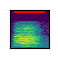

<Figure size 2000x500 with 0 Axes>

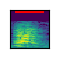

<Figure size 2000x500 with 0 Axes>

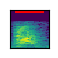

<Figure size 2000x500 with 0 Axes>

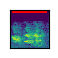

<Figure size 2000x500 with 0 Axes>

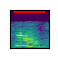

<Figure size 2000x500 with 0 Axes>

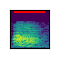

<Figure size 2000x500 with 0 Axes>

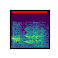

<Figure size 2000x500 with 0 Axes>

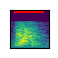

<Figure size 2000x500 with 0 Axes>

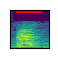

<Figure size 2000x500 with 0 Axes>

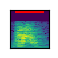

<Figure size 2000x500 with 0 Axes>

In [64]:
plot_syll_examples(syll_df, syll_label = 's', song_folder_path = song_folder_path, padding = 0.01, figsize = (0.5, 0.5), n_examples = 10, 
                   out_path= 'B447_unlabeled_syllable')

## Plot Spectrograms with Segmentations

In [132]:
Bird_ID = 'B447'

syll_df = pd.read_csv("D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "larger_set_labels.csv"  ) 
syll_df.labels = 's'

song_folder_path = "G:\\Grad_School\\Song_Data\\avn_larger_song_sets\\" 

In [133]:
from avn.plotting import *

In [134]:
def plot_spectrogram_with_labels(syll_df, song_folder_path, Bird_ID, song_file = None, song_file_index = None,
                                 onset = None, offset = None, 
                                 figsize = (80, 10), out_path = None, 
                                 cmap = 'tab20',  add_legend = True, fontsize = 24):
    """
    Plots the sectrogram of a specified file with syllable labels indicated through colored bars overlaid on spectrogram. 

    Parameters
    ----------
    syll_df: Pandas DataFrame
        pandas dataframe containing one row for every syllable to be analyzed
        from the subject bird. It must contain columns *onsets* and *offsets* 
        which contain the timestamp in seconds at which the syllable occurs 
        within a file, *files* which contains the name of the .wav file in 
        which the syllable is found, and *labels* which contains a categorical
        label for the syllable type. These can be generated through manual song
        annotation, or automated labeling methods. 

    song_folder_path: string
        Path to folder containing a subfolder called `Bird_ID`, which contains 
        .wav files of songs in syll_df. Should end with '/'.

    Bird_ID: string
        String containing a unique identifier for the subject bird.

    song_file: string, optional
        A value must be provided for `song_file` OR `song_file_index`, but not both. 
        String containing the name of a .wav file in `syll_df` and `song_folder_path/Bird_ID/` 
        to be plotted. 

    song_file_index: int >= 0, optional
        A value must be provided for `song_file` or `song_file_index`, but not both. 
        Denotes the index of the unique file in syll_df.files.unique() to be plotted. 

    figsize: tuple, optional
        Dimensions of figure to be plotted. The default is (80, 10). 

    cmap: matplotlib colormap, optional
        matplotlib color map for syllable labels. The colormap must contain more unique shades 
        than syllable label types. The default value is 'tab20'. 

    add_legend: boolean, optional
        If True, a legend mapping syllable labels to colors will be plotted over the spectrogram. 
        If False, no legend will be plotted. The default is True. 

    fontsize: float, optional
        The size of the font for the legend. The default is 24. 

    Returns
    -------
    None

    """
    #if both song file and song file index are prodivided, which file to plot if ambiguous so raise an error
    if (song_file != None) & (song_file_index != None):
        raise RuntimeError("Both `song_file` and `song_file_index` were provided. Please provide only one, otherwise the file to be plotted is ambiguous.")

    #set song file name according to song_file if it is provided
    if song_file != None: 
        song_file_name = song_file
    
    #set song file name according to song_file_index if it is provided
    if song_file_index != None: 
        song_file_name = syll_df.files.unique()[song_file_index]

    #if neither song file nor song file index are provided we will just plot the first file, but raise a warning
    if (song_file == None) & (song_file_index == None):
        song_file_name = syll_df.files.unique()[0]
        warnings.warn("No song_file or song_file_index were provided. The first file in syll_df will be plotted. To avoid ambiguity, please specify either song_file or song_file_index.")

    #set path to song file
    file_path = song_folder_path + Bird_ID + '/' + song_file_name

    #load song file
    song = dataloading.SongFile(file_path)
    song.bandpass_filter(500, 15000)

    if onset is not None:
        song.data, onset_padding, __ = avn.dataloading.Utils.select_syll(song, onset, offset, padding = 0)
        syll_df['onsets'] = syll_df.onsets - onset
        syll_df['offsets'] = syll_df.offsets - onset

    #make spectrogram
    spectrogram = make_spectrogram(song)

    #plot spectrogram
    fig, ax = plt.subplots(figsize = figsize)
    plot_spectrogram(spectrogram, song.sample_rate, ax = ax)
    
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])

    for spine in ax.spines.values():
            spine.set_edgecolor('white')

    #get y dimensions for adding syll labels
    ymin, ymax = ax.get_ylim()
    
    #create color dict for plotting syllable labels
    labels = syll_df.labels.unique()
    colors = plt.cm.get_cmap(cmap)(np.arange(len(labels)))#there must be more unique colors in cmap than label types
    color_dict = dict(zip(labels, colors))

    #loop over each syllable in syll_table in song_file:
    for ix, row in syll_df[syll_df.files == song_file_name].iterrows():

        #set color for syllable label
        color = color_dict[row.labels]

        #add patch to represent syllable label
        ax.add_patch(mpatches.Rectangle( [row.onsets, ymax - (ymax - ymin) / 5], 
                                         row.offsets -  row.onsets, 
                                         (ymax  - ymin) / 5,
                                         ec = 'none', 
                                         color = color))
    
    #if add_legend == True, add legend
    if add_legend == True: 
        markers  = [plt.Line2D([0, 0], [0, 0],  color = color, marker = 'o', linestyle = '') for color in color_dict.values()]
        ax.legend(markers, color_dict.keys(), numpoints = 1, facecolor = 'black', 
                  labelcolor = 'white', markerscale = 3, fontsize = fontsize, loc = 'upper right')
        
    if out_path is not None:
        fig.savefig(out_path, transparent=True)
        
    

In [135]:
syll_df.head(2)

,Unnamed: 0,onsets,offsets,cluster,files,audio,labels,X,Y,hdbscan_labels
0,0,0.942,1.023,zebra_finch_0,B447_43505.26440066_2_9_7_20_40.wav,[-0.0013664 0.00302395 0.00632897 ... 0.00...,s,2.327949,7.956043,3
1,1,1.033,1.123,zebra_finch_0,B447_43505.26440066_2_9_7_20_40.wav,[0.00245266 0.00187746 0.00165709 ... 0.001751...,s,1.159319,8.102309,3


C:\Users\tkoch\AppData\Local\Temp\ipykernel_11296\1177491911.py:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.arange(len(labels)))#there must be more unique colors in cmap than label types


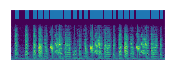

<Figure size 2000x500 with 0 Axes>

In [136]:
plot_spectrogram_with_labels(syll_df, song_folder_path, Bird_ID, 
                                          song_file_index = 20, figsize = (2, 0.66), add_legend = False, 
                                          onset = 0.3, offset = 2.7, 
                                          out_path= 'B447_mini_segmented_spectrogram_1.svg' )

C:\Users\tkoch\AppData\Local\Temp\ipykernel_11296\1177491911.py:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.arange(len(labels)))#there must be more unique colors in cmap than label types


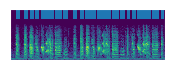

<Figure size 2000x500 with 0 Axes>

In [137]:
syll_df = pd.read_csv("D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "larger_set_labels.csv"  ) 
syll_df.labels = 's'

plot_spectrogram_with_labels(syll_df, song_folder_path, Bird_ID, 
                                          song_file_index = 10, figsize = (2, 0.66), add_legend = False, 
                                          onset = 0.6, offset = 3.0, 
                                          out_path= 'B447_mini_segmented_spectrogram_2.svg' )

C:\Users\tkoch\AppData\Local\Temp\ipykernel_11296\1177491911.py:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.arange(len(labels)))#there must be more unique colors in cmap than label types


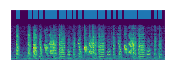

<Figure size 2000x500 with 0 Axes>

In [138]:
syll_df = pd.read_csv("D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "larger_set_labels.csv"  ) 
syll_df.labels = 's'

plot_spectrogram_with_labels(syll_df, song_folder_path, Bird_ID, 
                                          song_file_index = 12, figsize = (2, 0.66), add_legend = False, 
                                          onset = 0.6, offset = 3.0, 
                                          out_path= 'B447_mini_segmented_spectrogram_3.svg' )

## Plot Labeled Spectrograms

C:\Users\tkoch\AppData\Local\Temp\ipykernel_11296\1177491911.py:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.arange(len(labels)))#there must be more unique colors in cmap than label types


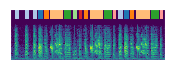

<Figure size 2000x500 with 0 Axes>

In [143]:
syll_df = pd.read_csv("D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "larger_set_labels.csv"  ) 

plot_spectrogram_with_labels(syll_df, song_folder_path, Bird_ID, 
                                          song_file_index = 20, figsize = (2, 0.66), add_legend = False, 
                                          onset = 0.3, offset = 2.7, 
                                          out_path= 'B447_mini_labeled_spectrogram_1.svg' 
                                          )

C:\Users\tkoch\AppData\Local\Temp\ipykernel_11296\1177491911.py:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.arange(len(labels)))#there must be more unique colors in cmap than label types


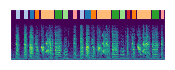

<Figure size 2000x500 with 0 Axes>

In [140]:
syll_df = pd.read_csv("D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "larger_set_labels.csv"  ) 

plot_spectrogram_with_labels(syll_df, song_folder_path, Bird_ID, 
                                          song_file_index = 10, figsize = (2, 0.66), add_legend = False, 
                                          onset = 0.6, offset = 3.0, 
                                          out_path= 'B447_mini_labeled_spectrogram_2.svg' )

C:\Users\tkoch\AppData\Local\Temp\ipykernel_11296\1177491911.py:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(np.arange(len(labels)))#there must be more unique colors in cmap than label types


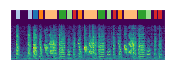

<Figure size 2000x500 with 0 Axes>

In [142]:
syll_df = pd.read_csv("D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "larger_set_labels.csv"  ) 

plot_spectrogram_with_labels(syll_df, song_folder_path, Bird_ID, 
                                          song_file_index = 12, figsize = (2, 0.66), add_legend = False, 
                                          onset = 0.6, offset = 3.0, 
                                          out_path= 'B447_mini_labeled_spectrogram_3.svg' )

## Sample AVN Feature Table